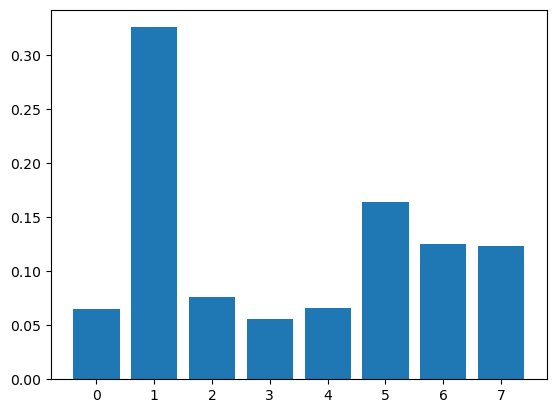

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-3.351824e-02,6.655021e-01,-3.345079e-16,1.662917e-01,0.468492,1.425995,1.365896
1,-0.844885,-1.206162,-5.298590e-01,-1.746338e-02,-3.345079e-16,-8.525312e-01,-0.365061,-0.190672,-0.732120
2,1.233880,2.015813,-6.953060e-01,8.087936e-16,-3.345079e-16,-1.332833e+00,0.604397,-0.105584,1.365896
3,-0.844885,-1.074652,-5.298590e-01,-7.004289e-01,-7.243887e-01,-6.342120e-01,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503458,-2.680669e+00,6.655021e-01,1.465506e-01,1.548980e+00,5.484909,-0.020496,1.365896
5,0.342981,-0.186965,1.319287e-01,8.087936e-16,-3.345079e-16,-9.980773e-01,-0.818079,-0.275760,-0.732120
6,-0.250952,-1.436303,-1.853434e+00,3.240194e-01,-7.950054e-01,-2.121282e-01,-0.676133,-0.616111,1.365896
7,1.827813,-0.219843,1.175571e-15,8.087936e-16,-3.345079e-16,4.137202e-01,-1.020427,-0.360847,-0.732120
8,-0.547919,2.476096,-1.989652e-01,1.803778e+00,4.560094e+00,-2.849013e-01,-0.947944,1.681259,1.365896
9,1.233880,0.108930,1.951845e+00,8.087936e-16,-3.345079e-16,-3.102502e-15,-0.724455,1.766346,1.365896


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from numpy import where

data = pd.read_csv('~/workspace/datasets/diabetes_kaggle_9_cols.csv')
df = data.copy()
features = data.copy()

# replace 0's with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# replace NaN's with the mean of the column
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

# split the data into X and y
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

# use standard scaler to scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# convert the data to a dataframe
X = pd.DataFrame(X, columns = df.columns[:-1])

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()